# Importing Libraries


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import cv2
import random
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
%matplotlib inline

# Preprocessing Data

In [3]:
main_directory = r"/content/drive/My Drive/Face Mask Detection/dataset"
categories = ['with mask', 'without mask']
num = [0,1]
num_label = dict(zip(categories,num))
print (num_label)

{'with mask': 0, 'without mask': 1}


In [4]:
data=[]
label=[]

for i in categories:
    path = os.path.join(main_directory, i)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        image=load_img(img_path,target_size=(256,256))
        image = img_to_array(image)
        image=preprocess_input(image)
        
        data.append(image)
        label.append(num_label[i])
        num_label
        
data = np.array(data, dtype="float32")
label = np.array(label)


In [5]:
print(len(data))

print(len(label))

data[1].shape

1376
1376


(256, 256, 3)

In [6]:
print (data[1])
print (label[1])

[[[-0.35686272 -0.40392154 -0.3098039 ]
  [-0.34117645 -0.38823527 -0.29411763]
  [-0.3333333  -0.38039213 -0.2862745 ]
  ...
  [ 0.79607844  0.58431375  0.34901965]
  [ 0.827451    0.6156863   0.3803922 ]
  [ 0.8352941   0.62352943  0.38823533]]

 [[-0.3333333  -0.38039213 -0.2862745 ]
  [-0.3490196  -0.3960784  -0.30196077]
  [-0.372549   -0.41960782 -0.32549018]
  ...
  [ 0.73333335  0.52156866  0.28627455]
  [ 0.7882353   0.5764706   0.3411765 ]
  [ 0.827451    0.6156863   0.3803922 ]]

 [[-0.2862745  -0.3333333  -0.23921567]
  [-0.31764704 -0.36470586 -0.27058822]
  [-0.35686272 -0.40392154 -0.3098039 ]
  ...
  [ 0.7411765   0.5294118   0.2941177 ]
  [ 0.79607844  0.58431375  0.34901965]
  [ 0.827451    0.6156863   0.3803922 ]]

 ...

 [[ 0.30196083 -0.23921567 -0.19999999]
  [ 0.28627455 -0.23137254 -0.19999999]
  [ 0.28627455 -0.23137254 -0.21568626]
  ...
  [-0.19215685 -0.00392157  0.20000005]
  [-0.23921567 -0.05098039  0.13725495]
  [-0.18431371 -0.01176471  0.1686275 ]]

 [

# **Preview**






Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


967
1


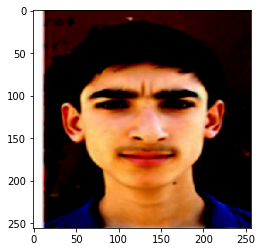

In [7]:
i = random.randint(1,len(data))
plt.imshow(data[i])
print(i)
print(label[i])

In [8]:
from keras.utils import np_utils
newlabel=np.array(label)
label= np_utils.to_categorical(newlabel)

In [9]:
tf.image.rgb_to_grayscale(data, name=None)

<tf.Tensor: shape=(1376, 256, 256, 1), dtype=float32, numpy=
array([[[[ 0.7512044 ],
         [ 0.7512044 ],
         [ 0.75904673],
         ...,
         [ 0.5123926 ],
         [ 0.5045502 ],
         [ 0.46533847]],

        [[ 0.75904673],
         [ 0.75904673],
         [ 0.7668891 ],
         ...,
         [ 0.52023494],
         [ 0.5123926 ],
         [ 0.4810232 ]],

        [[ 0.7668891 ],
         [ 0.7668891 ],
         [ 0.7668891 ],
         ...,
         [ 0.528162  ],
         [ 0.52031964],
         [ 0.48895022]],

        ...,

        [[ 0.38032594],
         [ 0.45874947],
         [ 0.54007334],
         ...,
         [-0.77567494],
         [-0.7788286 ],
         [-0.7709863 ]],

        [[ 0.30134633],
         [ 0.3719275 ],
         [ 0.40385297],
         ...,
         [-0.786671  ],
         [-0.79451334],
         [-0.7828765 ]],

        [[ 0.401762  ],
         [ 0.47234318],
         [ 0.4801855 ],
         ...,
         [-0.8023557 ],
         [-0.81

#**Shuffling Data**

In [10]:
from sklearn.utils import shuffle
data,label=shuffle(data,label)

In [11]:
#data = np.array(data)/255

In [12]:
print (data[0])

[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         0.96862745]
  [1.         1.         0.96862745]
  [1.         1.         0.96862745]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         0.9607843 ]
  [1.         1.         0.9607843 ]
  [1.         1.         0.9607843 ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         0.94509804]
  [1.         1.         0.94509804]
  [1.         1.         0.94509804]]

 ...

 [[0.92941177 0.9372549  0.8980392 ]
  [0.92941177 0.9372549  0.8980392 ]
  [0.8980392  0.90588236 0.8666667 ]
  ...
  [0.96862745 0.96862745 0.9529412 ]
  [0.99215686 1.         0.9607843 ]
  [0.99215686 1.         0.9529412 ]]

 [[0.9764706  0.9843137  0.94509804]
  [0.9764706  0.9843137  0.94509804]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


194
[0. 1.]


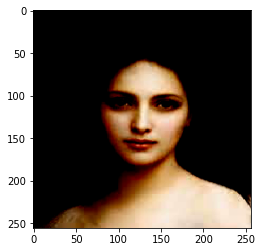

In [13]:
i = random.randint(1,len(data))
plt.imshow(data[i])
print(i)
print(label[i])

# **Spliting Data**

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size = 0.25, random_state = 0)

In [15]:
#from tensorflow.keras.utils import to_categorical
#data = to_categorical(data)
print(x_train.shape)
print(x_test.shape)


(1032, 256, 256, 3)
(344, 256, 256, 3)


In [16]:
from sklearn.utils import shuffle
x_train,y_train=shuffle(x_train,y_train)


In [17]:
tf.image.rgb_to_grayscale(x_train, name=None)
tf.image.rgb_to_grayscale(x_test, name=None)

<tf.Tensor: shape=(344, 256, 256, 1), dtype=float32, numpy=
array([[[[ 0.32668984],
         [ 0.32668984],
         [ 0.28747806],
         ...,
         [ 0.46421924],
         [ 0.4563769 ],
         [ 0.44853455]],

        [[ 0.2331377 ],
         [ 0.2488224 ],
         [ 0.2488224 ],
         ...,
         [ 0.4720616 ],
         [ 0.46421924],
         [ 0.4563769 ]],

        [[ 0.21519338],
         [ 0.2465628 ],
         [ 0.25440514],
         ...,
         [ 0.47990397],
         [ 0.46421924],
         [ 0.4563769 ]],

        ...,

        [[ 0.24809216],
         [ 0.22456512],
         [ 0.20888041],
         ...,
         [-0.01492272],
         [ 0.02024119],
         [ 0.03366629]],

        [[ 0.23061922],
         [ 0.23061922],
         [ 0.22277687],
         ...,
         [-0.04629213],
         [-0.03465527],
         [-0.02123018]],

        [[ 0.19051336],
         [ 0.19051336],
         [ 0.19051336],
         ...,
         [-0.04629213],
         [-0.034

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


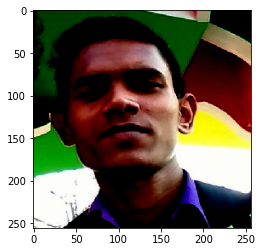

In [18]:
plt.figure()
plt.imshow(x_train[53],cmap='gray')

# **Training the Model**

In [19]:
from tensorflow.keras import models,datasets,layers
CNN = models.Sequential()
CNN.add(layers.Conv2D(200,(3,3),activation='relu',input_shape=x_train[0].shape))
CNN.add(layers.AveragePooling2D(pool_size=(2,2)))

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(80,(3,3),activation='relu'))
CNN.add(layers.AveragePooling2D(pool_size=(2,2)))

CNN.add(layers.Flatten())



CNN.add(layers.Dense(50,activation='relu'))
CNN.add(layers.Dense(2,activation='softmax'))
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 200)     5600      
_________________________________________________________________
average_pooling2d (AveragePo (None, 127, 127, 200)     0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 127, 200)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 80)      144080    
_________________________________________________________________
average_pooling2d_1 (Average (None, 62, 62, 80)        0         
_________________________________________________________________
flatten (Flatten)            (None, 307520)            0         
_________________________________________________________________
dense (Dense)                (None, 50)                1

In [20]:
CNN.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = CNN.fit(x_train,
       y_train,
       batch_size=64,
       epochs=10,
       verbose=1
       )

Epoch 1/10
17/17 [==============================] - 406s 24s/step - loss: 1.3920 - accuracy: 0.5678
Epoch 2/10
17/17 [==============================] - 419s 25s/step - loss: 0.2979 - accuracy: 0.9118
Epoch 3/10
17/17 [==============================] - 434s 26s/step - loss: 0.1515 - accuracy: 0.9632
Epoch 4/10
17/17 [==============================] - 438s 26s/step - loss: 0.1089 - accuracy: 0.9680
Epoch 5/10
17/17 [==============================] - 440s 26s/step - loss: 0.0803 - accuracy: 0.9641
Epoch 6/10
17/17 [==============================] - 429s 25s/step - loss: 0.0876 - accuracy: 0.9758
Epoch 7/10
17/17 [==============================] - 422s 25s/step - loss: 0.0698 - accuracy: 0.9835
Epoch 8/10
17/17 [==============================] - 428s 25s/step - loss: 0.0505 - accuracy: 0.9874
Epoch 9/10
17/17 [==============================] - 430s 25s/step - loss: 0.0534 - accuracy: 0.9893
Epoch 10/10
17/17 [==============================] - 432s 25s/step - loss: 0.0443 - accuracy: 0.9932

No handles with labels found to put in legend.


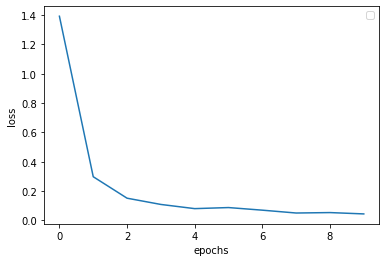

11/11 [==============================] - 34s 3s/step - loss: 0.1963 - accuracy: 0.9709
[0.1962614506483078, 0.9709302186965942]


In [23]:
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
print(CNN.evaluate(x_test,y_test))